##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Time windows

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l08c04_time_windows.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l08c04_time_windows.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Setup

In [2]:
from keras import datasets
from keras.preprocessing.sequence import pad_sequences

## Data Load

In [3]:
vocab_size = 500
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(X_train[:5])

[list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 

In [5]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [6]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (25000, 100)
X_test의 크기(shape) : (25000, 100)


In [7]:
print(y_train[:5])

[1 0 0 1 0]


##1D CNN으로 IMDB 리뷰 분류하기

In [8]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [9]:
embedding_dim = 16 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 32 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 64 # 뉴런의 수

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=3)
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64, callbacks=[es, mc])

Epoch 1/100
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5800 - loss: 0.6546
Epoch 1: val_acc improved from -inf to 0.76568, saving model to best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc: 0.5804 - loss: 0.6543 - val_acc: 0.7657 - val_loss: 0.4883
Epoch 2/100
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7682 - loss: 0.4835
Epoch 2: val_acc improved from 0.76568 to 0.78660, saving model to best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.7682 - loss: 0.4835 - val_acc: 0.7866 - val_loss: 0.4525
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7916 - loss: 0.4467
Epoch 3: val_acc improved from 0.78660 to 0.80300, saving model to best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.7916 - loss: 0.4467 - val_acc: 0.8030 - val_loss: 0.4276
Epoch 4/100
383/391 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8032 - loss: 0.4281
Epoch 4: val_acc did not improve from 0.80300
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - acc: 0.8031

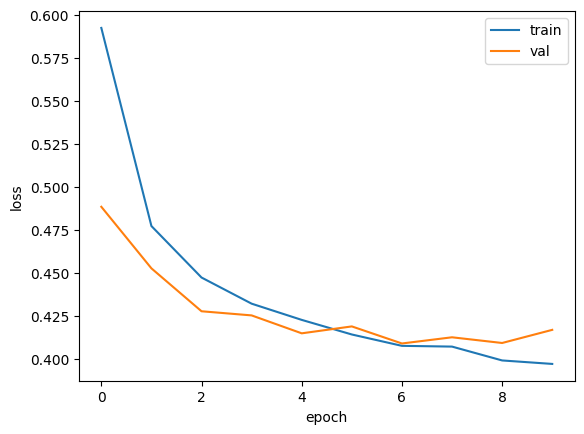

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
cnn_model = load_model('best_model.keras')

cnn_model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8090 - loss: 0.4115


[0.4088210165500641, 0.8109599947929382]